In [1]:
import tensorflow
from tensorflow.keras import layers,models,datasets
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential

In [2]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

In [3]:
xtrain.shape

(50000, 32, 32, 3)

In [4]:
xtest.shape

(10000, 32, 32, 3)

In [5]:
xtrain=xtrain/255
xtest=xtest/255

In [6]:
ytrain=ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
ytest=ytest.reshape(-1,)
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [29]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),padding="valid",strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=15,kernel_size=(3,3),padding="valid",strides=1,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(70,activation='relu'))
model.add(Dense(30,activation='relu'))         
model.add(Dense(2,activation='softmax'))
          


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 15)        4335      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 540)               0         
                                                                 
 dense_3 (Dense)             (None, 100)              

In [31]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [32]:
hist=model.fit(xtrain,ytrain,batch_size=2,epochs=3,validation_data=(xtest,ytest))

Epoch 1/3


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\SREEHARI CR\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\SREEHARI CR\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\SREEHARI CR\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\SREEHARI CR\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\SREEHARI CR\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\SREEHARI CR\AppData\Local\Temp\ipykernel_25924\1575429677.py", line 1, in <cell line: 1>
      hist=model.fit(xtrain,ytrain,batch_size=2,epochs=3,validation_data=(xtest,ytest))
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\engine\training.py", line 994, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\losses.py", line 2084, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\SREEHARI CR\anaconda3\lib\site-packages\keras\backend.py", line 5630, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 8 which is outside the valid range of [0, 2).  Label values: 8 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_727188]

In [12]:
#ytrain=ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
#ytest=ytest.reshape(-1,)
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [14]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
def plot_sample(X,Y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[Y[index]])

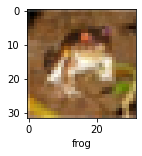

In [16]:
plot_sample(xtrain,ytrain,0)

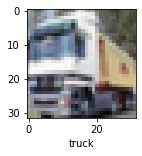

In [17]:
plot_sample(xtrain,ytrain,1)

In [18]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 3s 8ms/step - loss: 3.4012 - accuracy: 0.1000


[3.4011898040771484, 0.10000000149011612]

In [19]:
ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [20]:
y_pred=model.predict(xtest)

313/313 [==============================] - 2s 7ms/step


In [21]:
y_pred[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [22]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]           

[0, 0, 0, 0, 0]

In [23]:
ytest[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

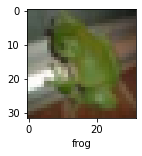

In [24]:
plot_sample(xtest,ytest,7)

In [25]:
classes[y_classes[7]]

'airplane'